In [1]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# load the CSV file for volume of production
production_data = pd.read_csv('dataset/Production_volume.csv')
area_data = pd.read_csv('dataset/Area_harvested.csv')

In [3]:
production_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,19309,8971,7603,15727,23007,4255,16790,11766,...,21812.54,7994.02,12843.31,20642.70,17725.19,4504.00,8023.29,20508.02,16674.00,2113.00
1,NaN,Antique,28275,7440,8542,22786,24485,4366,13921,13356,...,48447.00,19146.00,68364.00,46723.97,49682.35,16465.82,47858.70,46714.90,44793.44,12032.20
2,NaN,Capiz,18540,805,406,21903,17872,0,18969,7314,...,32306.30,12063.00,34517.30,25112.06,34479.18,14151.29,26893.60,16226.75,34625.30,12522.75
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,4328.00,911.00,6036.00,5334.00,5139.00,1020.00,4047.00,6451.00,3837.00,344.00
4,NaN,Iloilo,58187,14743,6823,81600,81691,1256,57985,65076,...,148946.00,14692.00,144971.00,106234.00,155663.00,9195.87,130644.00,160041.35,149292.00,6048.66


In [4]:
area_data.head()

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,6130,3440,2290,6890,7510,1610,6770,4440,...,6668.0,2461.18,4662,5832.77,6696.0,2171,3067,5940,6094,1138
1,NaN,Antique,9030,2430,2590,6350,9430,1620,4310,4770,...,12115.0,5903.00,15630,11325.00,12202.0,4452,10647,11220,12384,3506
2,NaN,Capiz,6300,520,100,5860,5830,0,4790,1940,...,9210.0,4508.00,8470,6704.00,9876.0,4648,6870,5000,9880,4143
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,1380.0,279.88,1534,1439.00,1330.0,350,1121,1821,1258,190
4,NaN,Iloilo,21270,6030,1850,23310,26270,440,16520,19140,...,41245.0,4235.00,41123,29142.00,42500.0,2658,38145,44625,43392,2124


In [5]:
# fill values for croptype
production_data['Croptype'] = production_data['Croptype'].ffill()
area_data['Croptype'] = area_data['Croptype'].ffill()

Restructure the dataset.

In [6]:
production_data = pd.melt(production_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Production')

area_data = pd.melt(area_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Area')

dataset = pd.merge(production_data, area_data, on=['Croptype', 'Province', 'Quarter and Year'], how='left')

In [7]:
dataset.head(5)

,Croptype,Province,Quarter and Year,Production,Area
0,Irrigated Palay,Aklan,Quarter 1 1987,19309.0,6130.0
1,Irrigated Palay,Antique,Quarter 1 1987,28275.0,9030.0
2,Irrigated Palay,Capiz,Quarter 1 1987,18540.0,6300.0
3,Irrigated Palay,Guimaras,Quarter 1 1987,0.0,0.0
4,Irrigated Palay,Iloilo,Quarter 1 1987,58187.0,21270.0


In [8]:
# split year and quarter into separte columns
dataset['Year'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[-1]))
dataset['Quarter'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[1][-1]))

# drop 'Quarter and Year' column
dataset.drop(columns=['Quarter and Year'], inplace=True)

# reorder columns
dataset = dataset[['Croptype', 'Province', 'Quarter', 'Year', 'Area', 'Production']]

In [9]:
dataset.head()

,Croptype,Province,Quarter,Year,Area,Production
0,Irrigated Palay,Aklan,1,1987,6130.0,19309.0
1,Irrigated Palay,Antique,1,1987,9030.0,28275.0
2,Irrigated Palay,Capiz,1,1987,6300.0,18540.0
3,Irrigated Palay,Guimaras,1,1987,0.0,0.0
4,Irrigated Palay,Iloilo,1,1987,21270.0,58187.0


Since Guimaras was included in Iloilo prior to 1994, we'll drop the data for those years to ensure accuracy.

In [10]:
dataset = dataset[dataset['Year'] >= 1994]

In [11]:
dataset.head(10)

,Croptype,Province,Quarter,Year,Area,Production
840,Irrigated Palay,Aklan,1,1994,9980.0,43151.0
841,Irrigated Palay,Antique,1,1994,11540.0,26667.0
842,Irrigated Palay,Capiz,1,1994,7300.0,20440.0
843,Irrigated Palay,Guimaras,1,1994,1930.0,7123.0
844,Irrigated Palay,Iloilo,1,1994,30770.0,118772.0
845,Rainfed Palay,Aklan,1,1994,8240.0,14339.0
846,Rainfed Palay,Antique,1,1994,3010.0,4635.0
847,Rainfed Palay,Capiz,1,1994,33890.0,74558.0
848,Rainfed Palay,Guimaras,1,1994,3910.0,8459.0
849,Rainfed Palay,Iloilo,1,1994,52990.0,137774.0


### Data exploration

In [12]:
# descriptive statistics
desc_stats = dataset.describe()

print("Descriptive Statistics:")
desc_stats

Descriptive Statistics:


,Quarter,Year,Area,Production
count,3660.000000,3660.000000,3660.000000,3660.000000
mean,2.483607,2008.754098,8881.118372,27284.182721
std,1.118067,8.808160,16200.694607,52128.970417
min,1.000000,1994.000000,0.000000,0.000000
25%,1.000000,2001.000000,177.500000,275.375000
50%,2.000000,2009.000000,2400.500000,5842.500000
75%,3.000000,2016.000000,9105.500000,28115.920000
max,4.000000,2024.000000,115071.000000,411113.000000


In [13]:
# Frequency distribution of categorical variables
print(dataset['Croptype'].value_counts())
print(dataset['Province'].value_counts())

Croptype
Irrigated Palay    610
Rainfed Palay      610
Palay              610
White Corn         610
Yellow Corn        610
Corn               610
Name: count, dtype: int64
Province
Aklan       732
Antique     732
Capiz       732
Guimaras    732
Iloilo      732
Name: count, dtype: int64


In [14]:
# check for zero values in the entire DataFrame
print((dataset == 0).sum())

Croptype       0
Province       0
Quarter        0
Year           0
Area          83
Production    83
dtype: int64


Handling zero values. Using meadian since it is less sensitive to outliers.

In [15]:
dataset.replace(0, np.nan, inplace=True)

imputer = SimpleImputer(strategy='median')
dataset[['Production', 'Area']] = imputer.fit_transform(dataset[['Production', 'Area']])

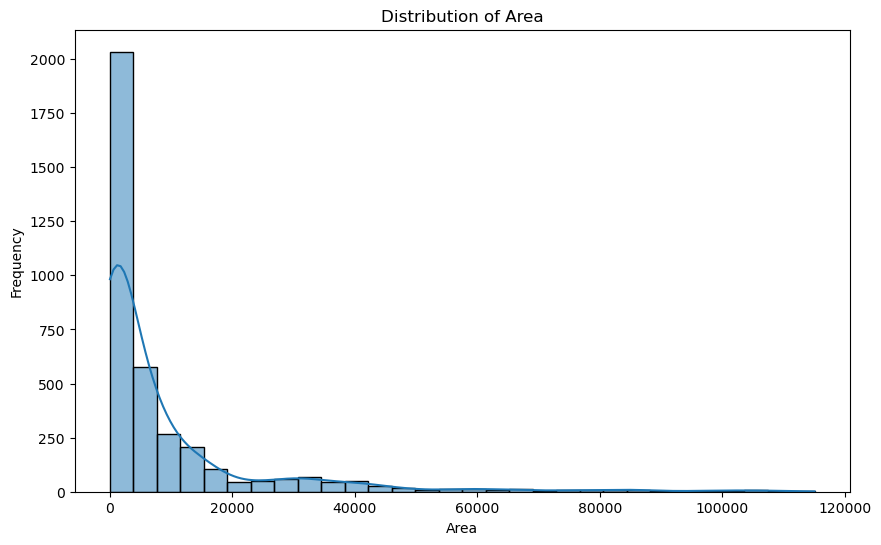

In [16]:
# Plot histogram for Area
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Area'], kde=True, bins=30)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

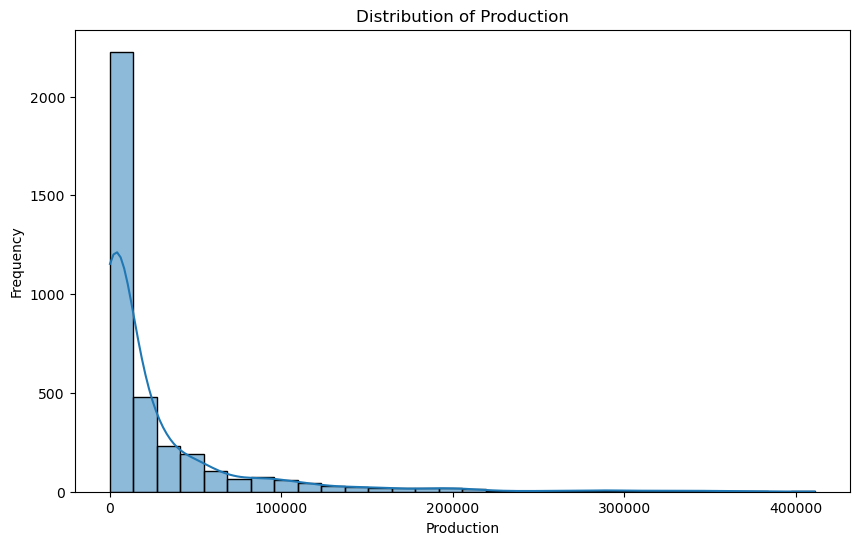

In [17]:
# Plot histogram for Production
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Production'], kde=True, bins=30)
plt.title('Distribution of Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

We can observe from both plots that the distribution of production and area are skewed to the right.

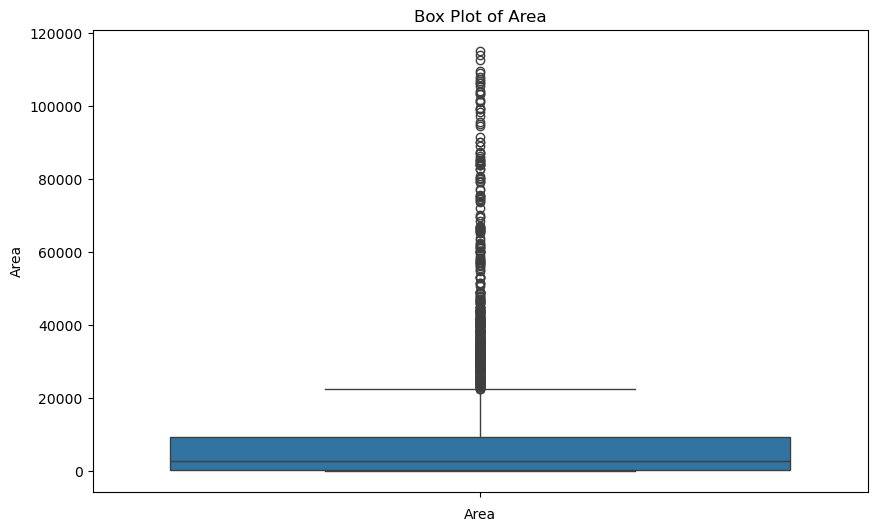

In [18]:
# Box plot for Area
plt.figure(figsize=(10, 6))
sns.boxplot(y=dataset['Area'])
plt.title('Box Plot of Area')
plt.xlabel('Area')
plt.show()

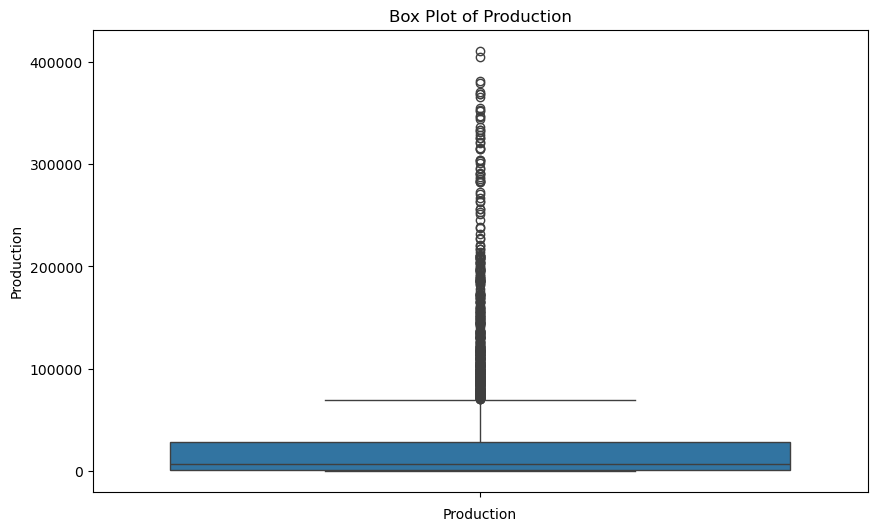

In [19]:
# Box plot for Area
plt.figure(figsize=(10, 6))
sns.boxplot(y=dataset['Production'])
plt.title('Box Plot of Production')
plt.xlabel('Production')
plt.show()

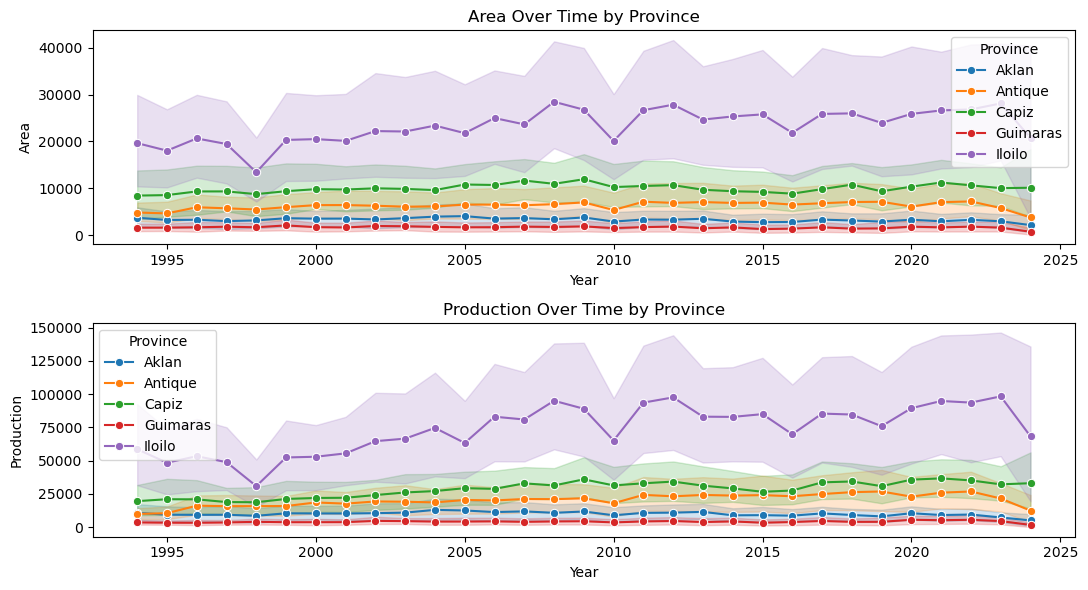

In [20]:
# plot Area and Production over time (Year and Quarter)
plt.figure(figsize=(11, 6))

# plot Area over time
plt.subplot(2, 1, 1)
sns.lineplot(data=dataset, x='Year', y='Area', hue='Province', marker='o')
plt.title('Area Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Area')

# plot Production over time
plt.subplot(2, 1, 2)
sns.lineplot(data=dataset, x='Year', y='Production', hue='Province', marker='o')
plt.title('Production Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

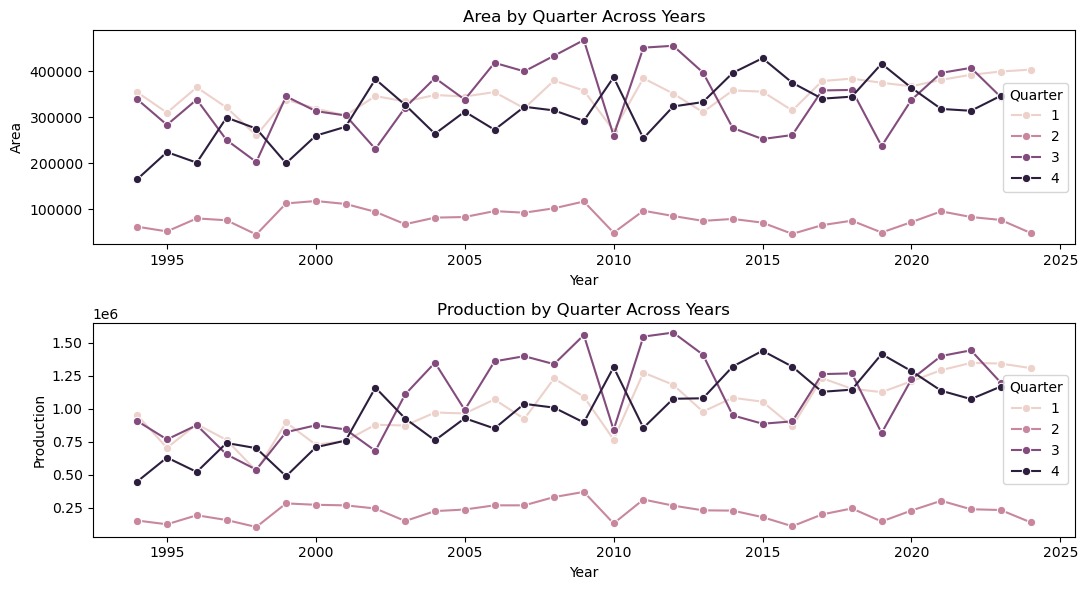

In [21]:
# aggregate data by Year and Quarter to see seasonal patterns
quarterly_data = dataset.groupby(['Year', 'Quarter'])[['Area', 'Production']].sum().reset_index()

# plot Area and Production for each quarter across the years
plt.figure(figsize=(11, 6))

# plot Area by Quarter
plt.subplot(2, 1, 1)
sns.lineplot(data=quarterly_data, x='Year', y='Area', hue='Quarter', marker='o')
plt.title('Area by Quarter Across Years')
plt.xlabel('Year')
plt.ylabel('Area')

# plot Production by Quarter
plt.subplot(2, 1, 2)
sns.lineplot(data=quarterly_data, x='Year', y='Production', hue='Quarter', marker='o')
plt.title('Production by Quarter Across Years')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

                Area  Production   Quarter      Year
Area        1.000000    0.986316  0.033490  0.035490
Production  0.986316    1.000000  0.053687  0.083145
Quarter     0.033490    0.053687  1.000000 -0.025386
Year        0.035490    0.083145 -0.025386  1.000000


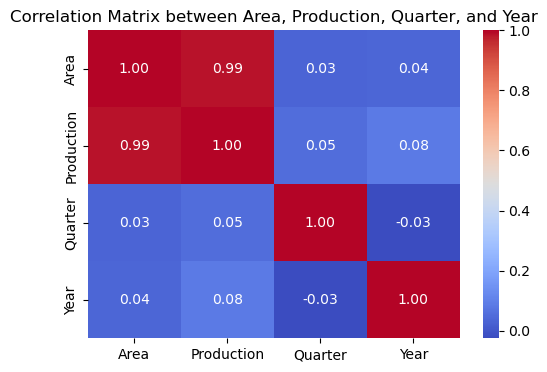

In [22]:
# calculate the correlation between Area and Production
corr = dataset[['Area', 'Production', 'Quarter', 'Year']].corr()
print(corr)

# visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Area, Production, Quarter, and Year')
plt.show()

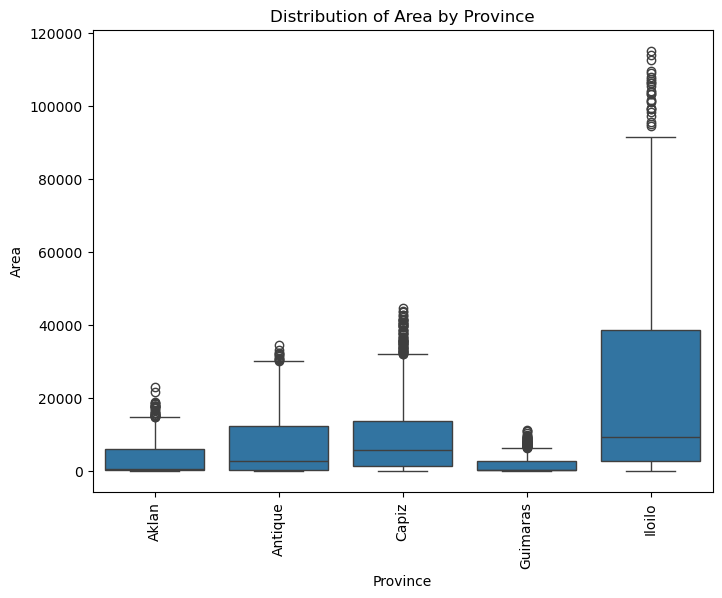

In [23]:
# Box plot for Area by Province
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Province', y='Area')
plt.title('Distribution of Area by Province')
plt.xticks(rotation=90)
plt.show()

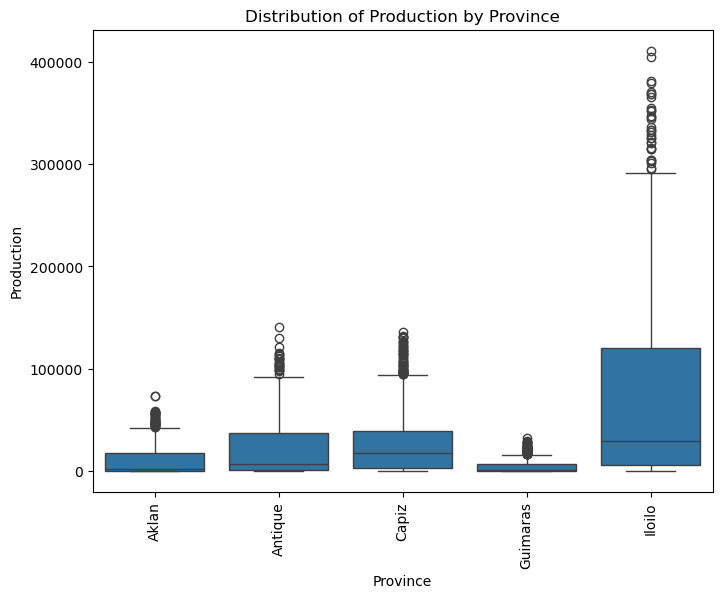

In [24]:
# Box plot for Production by Province
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Province', y='Production')
plt.title('Distribution of Production by Province')
plt.xticks(rotation=90)
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity on Area and Production
result_area = adfuller(dataset['Area'].dropna())  # Drop NaN values before running the test
result_prod = adfuller(dataset['Production'].dropna())

print(f"ADF Statistic for Area: {result_area[0]}, p-value: {result_area[1]}")
print(f"ADF Statistic for Production: {result_prod[0]}, p-value: {result_prod[1]}")

ADF Statistic for Area: -6.807481674945626, p-value: 2.15820201021865e-09
ADF Statistic for Production: -6.177440745940904, p-value: 6.578235928700613e-08


In [26]:
dataset.head(5)

,Croptype,Province,Quarter,Year,Area,Production
840,Irrigated Palay,Aklan,1,1994,9980.0,43151.0
841,Irrigated Palay,Antique,1,1994,11540.0,26667.0
842,Irrigated Palay,Capiz,1,1994,7300.0,20440.0
843,Irrigated Palay,Guimaras,1,1994,1930.0,7123.0
844,Irrigated Palay,Iloilo,1,1994,30770.0,118772.0


In [27]:
dataset.describe()

,Quarter,Year,Area,Production
count,3660.000000,3660.000000,3660.000000,3660.000000
mean,2.483607,2008.754098,8939.649246,27428.639005
std,1.118067,8.808160,16173.134051,52061.926816
min,1.000000,1994.000000,1.000000,0.700000
25%,1.000000,2001.000000,216.500000,355.187500
50%,2.000000,2009.000000,2581.000000,6370.000000
75%,3.000000,2016.000000,9105.500000,28115.920000
max,4.000000,2024.000000,115071.000000,411113.000000


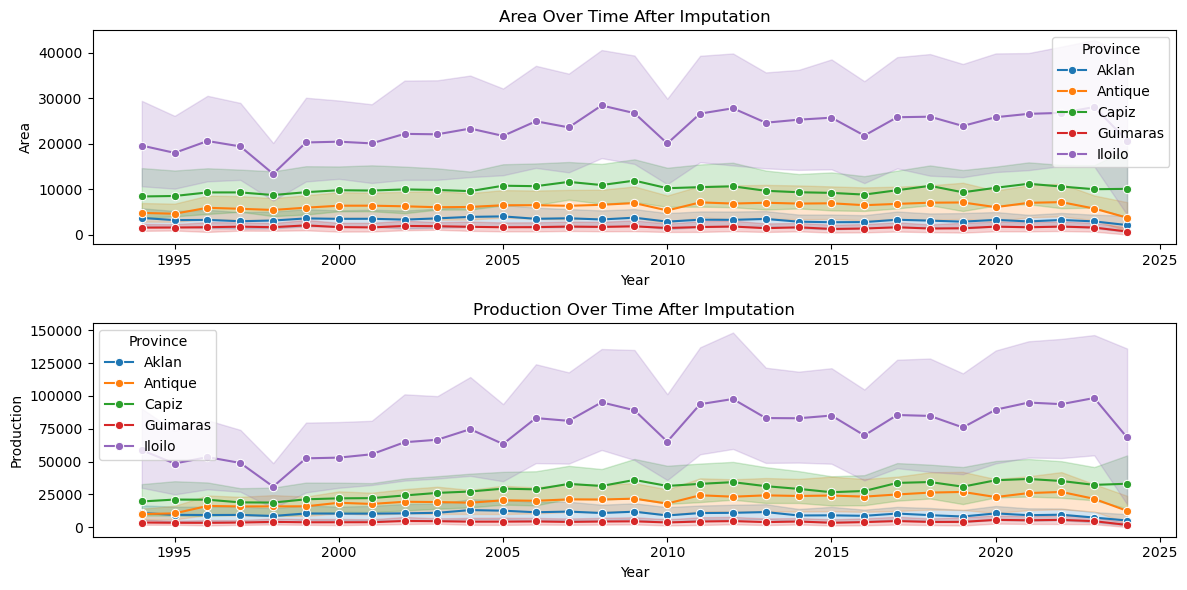

In [28]:
plt.figure(figsize=(12, 6))

# Plot Area
plt.subplot(2, 1, 1)
sns.lineplot(data=dataset, x='Year', y='Area', hue='Province', marker='o')
plt.title('Area Over Time After Imputation')
plt.xlabel('Year')
plt.ylabel('Area')

# Plot Production
plt.subplot(2, 1, 2)
sns.lineplot(data=dataset, x='Year', y='Production', hue='Province', marker='o')
plt.title('Production Over Time After Imputation')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

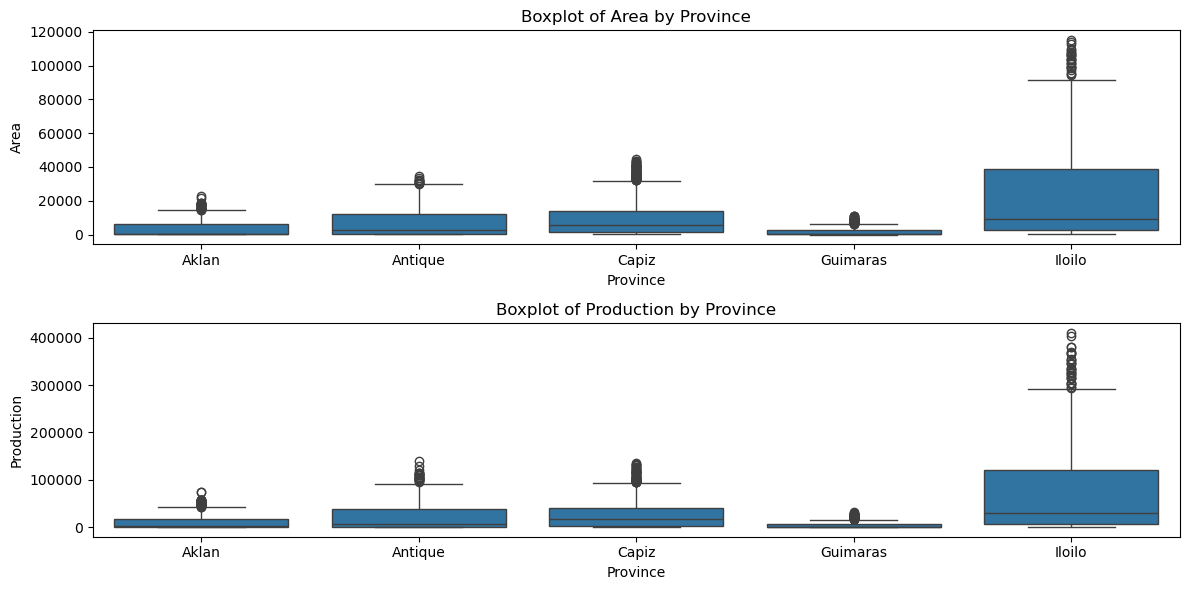

In [29]:
# Boxplot for Area and Production
plt.figure(figsize=(12, 6))

# Boxplot for Area
plt.subplot(2, 1, 1)
sns.boxplot(x='Province', y='Area', data=dataset)
plt.title('Boxplot of Area by Province')

# Boxplot for Production
plt.subplot(2, 1, 2)
sns.boxplot(x='Province', y='Production', data=dataset)
plt.title('Boxplot of Production by Province')

plt.tight_layout()
plt.show()

In [30]:
aggregated_data = dataset.groupby(['Croptype', 'Province', 'Quarter', 'Year']).agg(
    total_production=('Production', 'sum'),
    total_area=('Area', 'sum'),
).reset_index()

# Display the first few rows of the aggregated data
aggregated_data.head(10)

,Croptype,Province,Quarter,Year,total_production,total_area
0,Corn,Aklan,1,1994,6370.0,2581.0
1,Corn,Aklan,1,1995,222.0,370.0
2,Corn,Aklan,1,1996,212.0,340.0
3,Corn,Aklan,1,1997,199.0,302.0
4,Corn,Aklan,1,1998,244.0,285.0
5,Corn,Aklan,1,1999,80.0,127.0
6,Corn,Aklan,1,2000,81.0,121.0
7,Corn,Aklan,1,2001,49.0,70.0
8,Corn,Aklan,1,2002,101.0,126.0
9,Corn,Aklan,1,2003,81.0,90.0


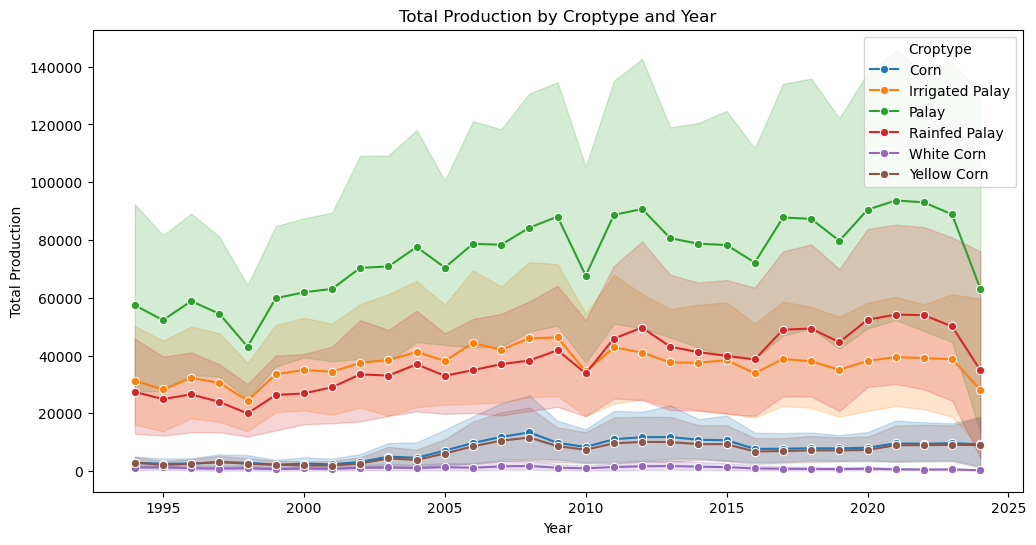

In [31]:
plt.figure(figsize=(12, 6))

# Cceate a line plot of total production over time for each Croptype
sns.lineplot(data=aggregated_data, x='Year', y='total_production', hue='Croptype', marker='o')

plt.title('Total Production by Croptype and Year')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend(title='Croptype')
plt.show()

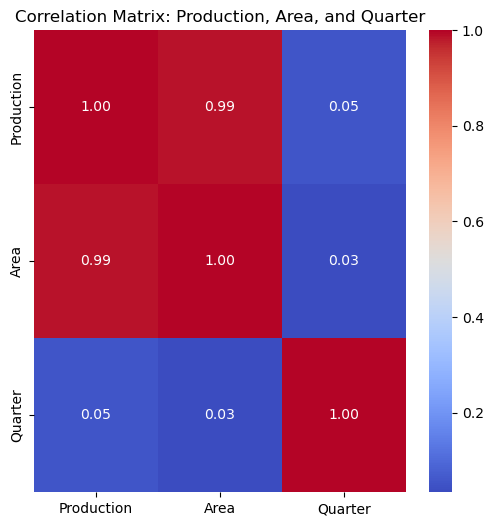

In [32]:
# calculate the correlation matrix
correlation_matrix = dataset[['Production', 'Area', 'Quarter']].corr()

# cisualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix: Production, Area, and Quarter')
plt.show()

In [33]:
dataset.set_index(['Year', 'Quarter'])

Croptype  Province     Area  Production
Year Quarter                                                
1994 1        Irrigated Palay     Aklan   9980.0    43151.00
     1        Irrigated Palay   Antique  11540.0    26667.00
     1        Irrigated Palay     Capiz   7300.0    20440.00
     1        Irrigated Palay  Guimaras   1930.0     7123.00
     1        Irrigated Palay    Iloilo  30770.0   118772.00
...                       ...       ...      ...         ...
2024 2                   Corn     Aklan    114.0      284.00
     2                   Corn   Antique    984.0     3787.29
     2                   Corn     Capiz   2581.0    11107.34
     2                   Corn  Guimaras     70.0       56.00
     2                   Corn    Iloilo   1116.0     2933.89

[3660 rows x 4 columns]